In [2]:
!pip install pandas
!pip install numpy

     ---------------------------------------- 0.0/10.4 MB ? eta -:--:--
     ---- ----------------------------------- 1.1/10.4 MB 17.2 MB/s eta 0:00:01
     ----------------- ---------------------- 4.6/10.4 MB 42.3 MB/s eta 0:00:01
     ------------------------------------ --- 9.3/10.4 MB 66.6 MB/s eta 0:00:01
     --------------------------------------  10.4/10.4 MB 72.6 MB/s eta 0:00:01
     --------------------------------------- 10.4/10.4 MB 50.4 MB/s eta 0:00:00


In [3]:
# 워드클라우드 생성 패키지
from wordcloud import WordCloud

# 워드클라우드 모양을 변형시키고자 하는 이미지 활용에 사용되는 패키지
from PIL import Image

# 그래프 출력 패키지
import matplotlib.pyplot as plt

# 형태소 분석기 => 사용하기 위해 java, 
from konlpy.tag import Okt
okt = Okt()

# 데이터 핸들링
import pandas as pd
# 수치 연산 패키지
import numpy as np
# csv파일 윈도우에 저장
import os

In [55]:
ntfl_df = pd.read_csv('./NTFL_NEWS_0101_0131.csv')

In [23]:
ntfl_df.info()

NameError: name 'ntfl_df' is not defined

In [58]:
ntfl_df.isna().sum()

뉴스 식별자                  0
일자                      0
언론사                     0
기고자                    88
제목                      0
통합 분류1                  0
통합 분류2                490
통합 분류3                963
사건/사고 분류1            2148
사건/사고 분류2            2305
사건/사고 분류3            2337
인물                    447
위치                    197
기관                      0
키워드                     0
특성추출(가중치순 상위 50개)       0
본문                      0
URL                     4
분석제외 여부              2248
dtype: int64

In [59]:
ntfl_df

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
0,2.100601e+06,20220131,한국경제,강영연,"크레디트스위스 ""테슬라만한 기업 없다 지금이 매수 기회"" [강영연의 뉴욕오프닝]",경제>증권_증시,경제>반도체,경제>자동차,NaN,NaN,NaN,NaN,"미국,뉴욕,한달안","비욘트미트,바클레이스,맥도날드,CNBC,시티그룹,크레디트 스위스,테슬라,크레디트스위...","크레디트스위스,테슬라,기업,매수,기회,강영연,뉴욕오프닝,기사,글로벌마켓,최대,해외,...","테슬라,비욘드미트,투자의견,넷플릭스,바클레이스,목표주가,음식점,스위스,한경,강영연,...",이 기사는 국내 최대 해외 투자정보 플랫폼 “한경 글로벌마켓”에 게재된 기사입니다....,https://www.hankyung.com/finance/article/20220...,NaN
1,2.100101e+06,20220131,매일경제,류영상,"""돈자랑, 명품자랑 좀 그만 했으면"" 송지아 압도적 1위 굴욕 2위는 이다인",문화>방송_연예,NaN,NaN,NaN,NaN,NaN,송지아,"미국,프리지아,한국","한양대,무용,제니,유튜브,디시인사이드,넷플릭스","돈자랑,명품자랑,송지아,압도,굴욕,2위,이다,명품,가품,짝퉁,착용,논란,활동,중단,...","송지아,1위,이다,한양대,구독자,2위,sns,가품,온라인,마이셀럽스,넷플릭스,솔로지...",명품 가품(짝퉁) 착용 논란으로 활동을 중단한 뷰티 크리에이터 송지아(활동명 프리지...,http://news.mk.co.kr/newsRead.php?no=92298&yea...,NaN
2,1.101101e+06,20220131,한국일보,이윤주,코로나19 속 두번째 설...'집콕'은 이제 국룰이 됐다,경제>유통,NaN,NaN,NaN,NaN,NaN,김부겸,"서울,일본,원룸촌,일평,석만,제주,인터컨티넨탈,한국,제주도,월평,인천공항","이마트,신세계조선호텔,관광협회,중국,현대백화점,코레일,넷플릭스,정보통신정책연구원,S...","코로나19,코로나19,번째,집콕,국룰,숫자,열차,명절,풍경,고속도,통행,절반,명절,...","코로나19,이용객,간편식,ott,가입자,영화관","‘명품은 역시, 자기만족이었네.’ 요즘 해외 명품 브랜드 가격 인상 전 백화점 오픈...",https://hankookilbo.com/News/Read/A20220128105...,NaN
3,2.100851e+06,20220131,아주경제,강일용,가입자 수 한계 부딪친 넷플릭스...돌파구는 게임 결합요금제?,IT_과학>콘텐츠,IT_과학>모바일,경제>자동차,NaN,NaN,NaN,NaN,"미국,아마존프라임","최고경영자,AP통신,CNBC,애플,디즈니,마이크로소프트,훌루,모건스탠리,넷플릭스,액...","가입자,한계,넷플릭스,돌파구,게임,결합요금,가입자,예측,시장,예상,3분,순수,OTT...","넷플릭스,ott,가입자,성장세,코로나19,가능성,다음날",[사진=넷플릭스] \n \n넷플릭스의 어닝 쇼크로 인해 온라인동영상스트리밍(OTT)...,https://www.ajunews.com/view/20220131182721431,NaN
4,2.100701e+06,20220131,헤럴드경제,이명수 기자,"넷플릭스 ‘지금 우리 학교는’, TV쇼 시리즈 전세계 1위.",사회>교육_시험,문화>방송_연예,NaN,NaN,NaN,NaN,NaN,플릭스,"넷플릭스,아이 엠","넷플릭스,학교,TV,시리즈,세계,학교,시리즈,넷플릭스,TV,시리즈,1위,차지,30일...","1위,넷플릭스,tv,조지나,동명,자들,웹툰,고등학교,12부,플릭스,ott,800포인...",[헤럴드경제=이명수 기자] ‘지금 우리 학교는’이 넷플릭스 TV쇼 시리즈 부문에서 ...,http://biz.heraldcorp.com/view.php?ud=20220131...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,2.100201e+06,20220101,머니투데이,변휘|기자,왓챠 떠난 '왕좌의 게임' 넷플 디플 벅찬데 '더 센 놈' 온다,IT_과학>콘텐츠,IT_과학>모바일,NaN,NaN,NaN,NaN,"워너,박시후,이시영","미국,유포리아,서울,장르,할리우드,한국,아시아·태평양","월트디즈니,HBO,왓챠,워너미디어,장르,HBO맥스,넷플릭스,웨스트월드,방송통신위원회...","왕좌,게임,넷플,디플,한국,론칭,HBO맥스,OTT,서비스,차례,종료,OTT,온라인,...","한국,hbo,ott,맥스,시청자,이용자,hbo맥스,넷플릭스,왓챠,루크,워너,론칭,경쟁력","[머니투데이 변휘 기자] ['한국 론칭' 구인 나선 HBO맥스, 국내 OTT 서비스...",http://news.moneytoday.co.kr/view/mtview.php?n...,NaN
2346,2.100851e+06,20220101,아주경제,오수연,[디지털 혁신의 시대로] ③ 올해도 'K콘텐츠' 글로벌 열풍 이어간다,IT_과학>콘텐츠,경제>경제일반,IT_과학>모바일,NaN,NaN,NaN,NaN,"미국,일본,대만,한국","게티이미지뱅크,네이버,넷플릭스,KT,스튜디오앤뉴,국회,방송통신위원회,디즈니+,웰메이...","K콘텐츠,글로벌,열풍,사진,게티이미지뱅크,게임,오징어,K콘텐츠,세계적,인기,2022...","한국,ott,만큼,사업자,넷플릭스,디즈니,자회사,전성기,티빙",[사진=게티이미지뱅크] \n \n \n2021년 '오징어 게임' 등 K콘텐츠가 전 ...,https://www.ajunews.com/view/20211227184124800,NaN
2347,1.100201e+06,20220101,국민일보,NaN,[최현주의 밥상+머리] 새해에 마주할 어떤 친구들에 대하여,문화>생활,문화>출판,문화>방송_연예,NaN,NaN,NaN,윤선도,"세지,평안북도","선우사,청양고,선우,넷플릭스","새해,친구들,욕심,가시,손아귀,백석,돌발퀴즈,힌트,시인,포함,세지,파리,만큼,나조반...","밥상,흰밥,선우사,굴국,백석,만큼,새우젓,무이징게국,친구들,자들,규중칠우,환경론,五...",‘우리들은 모두 욕심이 없어 희여졌다/ 착하디착해서 세은 가시 하나 손아귀 하나 없...,http://news.kmib.co.kr/article/view.asp?arcid=...,NaN
2348,1.100201e+06,20220101,국민일보,NaN,[사설] 역경을 희망으로 극복하고 화해와 통합의 시대 열자,미분류,NaN,NaN,NaN,NaN,NaN,메난드로스,"북,미국,미,첨단,한국,대한민국,호주","한반도,고위공직자범죄수사처,정부,그리스,검찰,불공정,남북이산,넷플릭스,증오","역경,희망,극복,화해,통합,시대,열자,일상,회복,사람,세상,2022년,새해,시작,어...","코로나,미국,대한민국,부동산,빌보드,한국,사람들,넷플릭스,소년단,猫鼠同處,묘서동처,...",임인년 새해가 밝았다. 희망찬 기대와 함께 새로운 시작을 해야 하는데 어깨가 무겁다...,http://news.kmib.co.kr/article/view.asp?arcid=...,NaN


In [20]:
ntfl_df.isna().sum()

제목                   0
키워드                  0
특성추출(가중치순 상위 50개)    0
dtype: int64

,제목,키워드,특성추출(가중치순 상위 50개)
0,"크레디트스위스 ""테슬라만한 기업 없다 지금이 매수 기회"" [강영연의 뉴욕오프닝]","크레디트스위스,테슬라,기업,매수,기회,강영연,뉴욕오프닝,기사,글로벌마켓,최대,해외,...","테슬라,비욘드미트,투자의견,넷플릭스,바클레이스,목표주가,음식점,스위스,한경,강영연,..."
1,"""돈자랑, 명품자랑 좀 그만 했으면"" 송지아 압도적 1위 굴욕 2위는 이다인","돈자랑,명품자랑,송지아,압도,굴욕,2위,이다,명품,가품,짝퉁,착용,논란,활동,중단,...","송지아,1위,이다,한양대,구독자,2위,sns,가품,온라인,마이셀럽스,넷플릭스,솔로지..."
2,코로나19 속 두번째 설...'집콕'은 이제 국룰이 됐다,"코로나19,코로나19,번째,집콕,국룰,숫자,열차,명절,풍경,고속도,통행,절반,명절,...","코로나19,이용객,간편식,ott,가입자,영화관"
3,가입자 수 한계 부딪친 넷플릭스...돌파구는 게임 결합요금제?,"가입자,한계,넷플릭스,돌파구,게임,결합요금,가입자,예측,시장,예상,3분,순수,OTT...","넷플릭스,ott,가입자,성장세,코로나19,가능성,다음날"
4,"넷플릭스 ‘지금 우리 학교는’, TV쇼 시리즈 전세계 1위.","넷플릭스,학교,TV,시리즈,세계,학교,시리즈,넷플릭스,TV,시리즈,1위,차지,30일...","1위,넷플릭스,tv,조지나,동명,자들,웹툰,고등학교,12부,플릭스,ott,800포인..."
...,...,...,...
2345,왓챠 떠난 '왕좌의 게임' 넷플 디플 벅찬데 '더 센 놈' 온다,"왕좌,게임,넷플,디플,한국,론칭,HBO맥스,OTT,서비스,차례,종료,OTT,온라인,...","한국,hbo,ott,맥스,시청자,이용자,hbo맥스,넷플릭스,왓챠,루크,워너,론칭,경쟁력"
2346,[디지털 혁신의 시대로] ③ 올해도 'K콘텐츠' 글로벌 열풍 이어간다,"K콘텐츠,글로벌,열풍,사진,게티이미지뱅크,게임,오징어,K콘텐츠,세계적,인기,2022...","한국,ott,만큼,사업자,넷플릭스,디즈니,자회사,전성기,티빙"
2347,[최현주의 밥상+머리] 새해에 마주할 어떤 친구들에 대하여,"새해,친구들,욕심,가시,손아귀,백석,돌발퀴즈,힌트,시인,포함,세지,파리,만큼,나조반...","밥상,흰밥,선우사,굴국,백석,만큼,새우젓,무이징게국,친구들,자들,규중칠우,환경론,五..."
2348,[사설] 역경을 희망으로 극복하고 화해와 통합의 시대 열자,"역경,희망,극복,화해,통합,시대,열자,일상,회복,사람,세상,2022년,새해,시작,어...","코로나,미국,대한민국,부동산,빌보드,한국,사람들,넷플릭스,소년단,猫鼠同處,묘서동처,..."


In [60]:
print(os.getcwd())

C:\Users\TECH2_25\TIL


In [10]:
import os

# 현재 작업 디렉토리 변경
os.chdir('C:/Users/TECH2_25/TIL')

# ntfl_df 파일을 C:/Users/TECH2_25/TIL 디렉토리에 저장
# ntfl_df.to_csv('my_ntfl_df.csv')


In [11]:
print(os.getcwd())

C:\Users\TECH2_25\TIL


In [12]:
wc_df = pd.read_csv('./my_ntfl_df.csv', encoding = 'utf-8')

In [13]:
wc = wc_df.set_index('키워드').to_dict()['']

KeyError: ''

In [14]:
df = pd.read_csv('./fruit_vegetable.csv', encoding = 'utf-8')

In [15]:
wc_1 = df.set_index('title').to_dict()['count']

In [16]:
df

,title,count
0,체리,1383889
1,자두,1204625
2,딸기,217781
3,오렌지,964387
4,사과,36808
...,...,...
100,순무,340806
101,브로콜리,1168084
102,인삼,1067180
103,쑥갓,506682


In [17]:
wc_1

{'체리': 1383889,
 '자두': 1204625,
 '딸기': 217781,
 '오렌지': 964387,
 '사과': 36808,
 '키위': 1251575,
 '메론': 661962,
 '포도': 307047,
 '버찌': 1066812,
 '야자': 1431036,
 '복숭아': 1435161,
 '레몬': 131583,
 '수박': 1195869,
 '망고': 1254191,
 '홍시': 1550998,
 '머루': 446652,
 '자몽': 234801,
 '살구': 890742,
 '리치': 1134566,
 '다래': 817943,
 '모과': 822911,
 '거봉': 1028846,
 '유자': 383702,
 '베리': 385685,
 '매실': 1398897,
 '코코넛': 145314,
 '바나나': 1138430,
 '석류': 1161558,
 '대추': 773260,
 '단감': 128152,
 '슈가애플': 1563141,
 '망고스틴': 479459,
 '두리안': 655751,
 '산딸기': 961945,
 '아보카도': 510021,
 '구아바': 735659,
 '무화과': 1224165,
 '파파야': 1202724,
 '블루베리': 1387508,
 '파인애플': 441927,
 '한라봉': 381522,
 '스타후르츠': 480232,
 '블림빙': 905811,
 '잠부': 1285651,
 '오미자': 419099,
 '끌렝깽': 3431,
 '사워': 508500,
 '감자': 1384936,
 '고구마': 1162754,
 '깻잎': 39886,
 '당근': 591557,
 '도라지': 97821,
 '대파\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0': 449142,
 '마늘': 1039945,
 '무\xa0\xa0\xa0': 1181477,
 '미나리': 229827,
 '버섯': 236409,
 '배추': 613433,


In [20]:
wordCloud = WordCloud(
font_path = 'malgun',
width = 400,
height = 400,
max_font_size = 100,
background_color = 'white'
).generate_from_frequencies(wc_1)

(-0.5, 399.5, 399.5, -0.5)

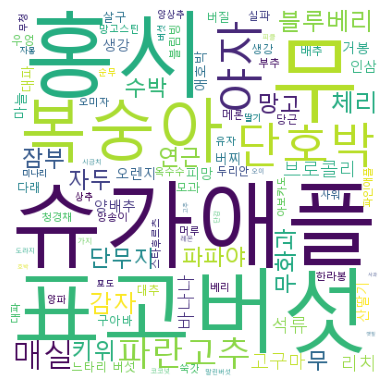

In [22]:
plt.figure()
plt.imshow(wordCloud)
plt.axis('off')